# IMDB Movie review sentiment prediction

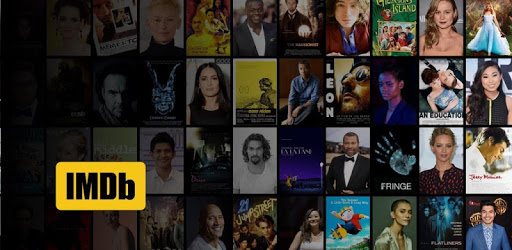

## Imports

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from sklearn import metrics

## Load dataset

In [2]:
df = pd.read_csv('IMDB_Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

## Data manipulation

In [3]:
df.sentiment = df.sentiment.apply(lambda x: 1 if x == 'positive' else 0)
df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

## Stratified K-fold cross validation

In [4]:
df['kfold'] = -1
df.head()

review  sentiment  kfold
0  One of the other reviewers has mentioned that ...          1     -1
1  A wonderful little production. <br /><br />The...          1     -1
2  I thought this was a wonderful way to spend ti...          1     -1
3  Basically there's a family where a little boy ...          0     -1
4  Petter Mattei's "Love in the Time of Money" is...          1     -1

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
y = df.sentiment.values

In [7]:
kf = StratifiedKFold(n_splits=5)

In [8]:
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f
df.head()

review  sentiment  kfold
0  I have nothing against religious movies. Relig...          0      0
1  Italian-born Eleonora has inherited from her d...          0      0
2  I hate to admit it, but I didn't find it to be...          1      0
3  I know that this show gave a lot of liberation...          0      0
4  This movie is exactly the same as Ridley Scott...          0      0

## Bag of words

In [19]:
for fold_ in range(5):
    df_train = df[df.kfold != fold_].reset_index(drop=True)
    df_test = df[df.kfold == fold_].reset_index(drop=True)
    count_vec = CountVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )
    count_vec.fit(df.review)
    xtrain = count_vec.transform(df_train.review)
    xtest = count_vec.transform(df_test.review)
    model = LogisticRegression()
    model.fit(xtrain, df_train.sentiment)
    preds = model.predict(xtest)
    accuracy = metrics.accuracy_score(df_test.sentiment, preds)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Accuracy = 0.8955



C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 1
Accuracy = 0.8914



C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 2
Accuracy = 0.8909



C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 3
Accuracy = 0.8898

Fold: 4
Accuracy = 0.8898



C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tf-idf

In [21]:
score = []
for fold_ in range(5):
    df_train = df[df.kfold != fold_].reset_index(drop=True)
    df_test = df[df.kfold == fold_].reset_index(drop=True)
    tfidf_vec = TfidfVectorizer(
        tokenizer=word_tokenize,
        token_pattern=None
    )
    tfidf_vec.fit(df.review)
    xtrain = tfidf_vec.transform(df_train.review)
    xtest = tfidf_vec.transform(df_test.review)
    model = LogisticRegression()
    model.fit(xtrain, df_train.sentiment)
    preds = model.predict(xtest)
    accuracy = metrics.accuracy_score(df_test.sentiment, preds)
    score.append(accuracy)
    print(f"Fold: {fold_}")
    print(f"Accuracy = {accuracy}")
    print("")

C:\Users\Alchemist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Accuracy = 0.8974

Fold: 1
Accuracy = 0.8963

Fold: 2
Accuracy = 0.895

Fold: 3
Accuracy = 0.8961

Fold: 4
Accuracy = 0.899



In [24]:
np.array(score).mean()

0.8967600000000001